In [1]:
from masters.env_wrapper import make_wrapped_env

In [2]:
import numpy as np
import pandas as pd

obs = []

for _ in range(50):
    done = False

    env = make_wrapped_env("CartPole-v0")
    env.reset()
    while not done:
        observation, reward, done, info = env.step(np.random.randint(0, 2))

        obs.append(observation)

obs = np.array(obs)

In [3]:
# примерный диапазон фичей (на самом деле плохое приближение, так как все они из околостартовой позиции)

pd.DataFrame(obs).describe()

,0,1,2,3
count,1079.000000,1079.000000,1079.000000,1079.000000
mean,-0.005215,0.054653,0.000334,-0.058137
std,0.073358,0.554714,0.103498,0.870524
min,-0.215594,-2.096367,-0.248406,-2.410608
25%,-0.052059,-0.339136,-0.058366,-0.610104
50%,-0.008764,0.036097,-0.001114,-0.048625
75%,0.035113,0.416690,0.056718,0.501915
max,0.357079,1.718405,0.246431,3.165024


In [4]:
import torch
from bindsnet.encoding.preprocessing import GaussianReceptiveFields, normal
from typing import Dict
from dataclasses import dataclass
from bindsnet.encoding.encodings import poisson

In [5]:
@dataclass
class FeatureInfo:
    min: float
    max: float
    n: int
    scale: float

In [6]:
class GaussianReceptiveFieldsEncoder:
    def __init__(self, encoding_info: Dict[int, FeatureInfo], time: int = 100):
        self.encoding_info = encoding_info
        self.time = time
        
        self.fields = {}
        for feature, info in encoding_info.items():
            self.fields[feature] = GaussianReceptiveFields(info.min, info.max, info.n, info.scale)
            
    def __call__(self, x: torch.Tensor):
        encoded_observations = {}
        
        for feature in self.fields:
            encoded_observations[feature] = poisson(time=self.time, datum=self.fields[feature](observation[feature]) * 100)
        
        return encoded_observations

In [7]:
encoding_info = {
    0: FeatureInfo(min=-1, max=1, scale=0.05, n=20),
    1: FeatureInfo(min=-2, max=2, scale=0.1, n=40),
    2: FeatureInfo(min=-1, max=1, scale=0.05, n=20),
    3: FeatureInfo(min=-10, max=10, scale=0.05, n=100)
}

In [8]:
encoder = GaussianReceptiveFieldsEncoder(encoding_info=encoding_info)

In [9]:
observation = np.array([0.5, -1, 0.02, -6])

In [10]:
observation

array([ 0.5 , -1.  ,  0.02, -6.  ])

In [11]:
encoded_observation = encoder(torch.from_numpy(observation))

In [12]:
from matplotlib import pyplot as plt

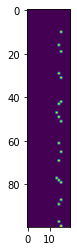

In [13]:
plt.imshow(encoded_observation[0])

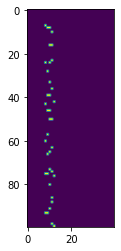

In [14]:
plt.imshow(encoded_observation[1])

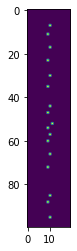

In [15]:
plt.imshow(encoded_observation[2])

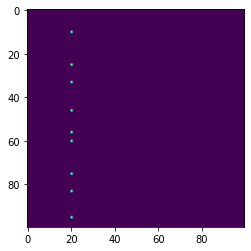

In [16]:
plt.imshow(encoded_observation[3])